In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('mergeddata.csv', parse_dates=['date'])

In [3]:
df.head()

,date,day,month,year,cases,deaths,countriesAndTerritories,location_key,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,2020-11-26,26,11,2020,200.0,12.0,Afghanistan,AF,AFG,38041757.0,Asia,7.341932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-25,25,11,2020,185.0,13.0,Afghanistan,AF,AFG,38041757.0,Asia,7.199983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-24,24,11,2020,246.0,17.0,Afghanistan,AF,AFG,38041757.0,Asia,6.713675,10.222222,5.722222,13.277778,16.002,NaN,7.222222,81.648174
3,2020-11-23,23,11,2020,252.0,8.0,Afghanistan,AF,AFG,38041757.0,Asia,6.655844,10.333333,8.000000,12.722222,8.128,NaN,8.777778,90.083356
4,2020-11-22,22,11,2020,154.0,12.0,Afghanistan,AF,AFG,38041757.0,Asia,6.203709,12.555556,4.888889,19.222222,0.000,NaN,-0.166667,41.566186


In [4]:
df.countriesAndTerritories.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

### USA ONLY

In [5]:
USA_only = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']

In [6]:
USA_only=USA_only[['date','cases']]

In [7]:
USA_only.head()

,date,cases
55383,2020-11-26,186589.0
55384,2020-11-25,170293.0
55385,2020-11-24,173963.0
55386,2020-11-23,157471.0
55387,2020-11-22,175494.0


In [8]:
USA_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 55383 to 55714
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    332 non-null    datetime64[ns]
 1   cases   332 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


In [9]:
USA_only=USA_only.groupby('date').sum()

In [10]:
USA_only

,cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-11-22,175494.0
2020-11-23,157471.0
2020-11-24,173963.0


In [11]:
USA_only=USA_only.resample(rule='M').sum()

In [12]:
USA_only.head()

,cases
date,
2019-12-31,0.0
2020-01-31,6.0
2020-02-29,60.0
2020-03-31,164554.0
2020-04-30,875289.0


<Axes: xlabel='date'>

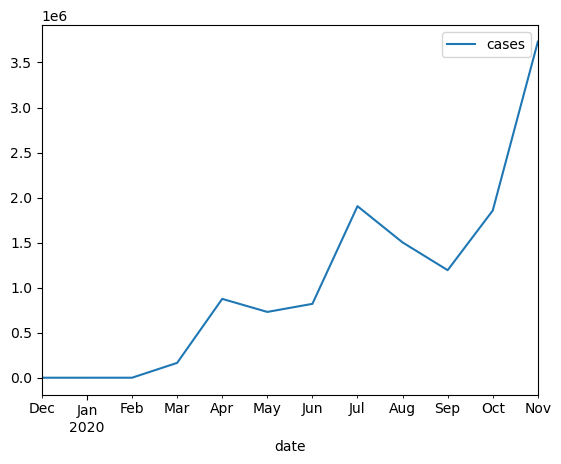

In [13]:
USA_only.plot()

In [14]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


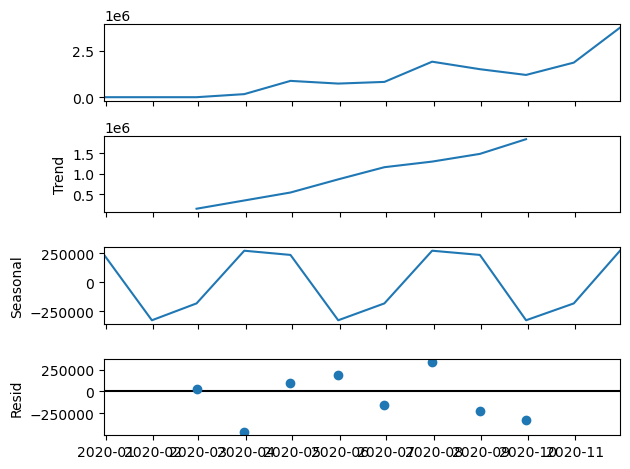

In [15]:
seasonal_decompose(USA_only, model='additive', period=4).plot();

In [16]:
len(USA_only)

12

In [17]:
train=USA_only[:8]
test=USA_only[8:]

In [18]:
train

,cases
date,
2019-12-31,0.0
2020-01-31,6.0
2020-02-29,60.0
2020-03-31,164554.0
2020-04-30,875289.0
2020-05-31,730475.0
2020-06-30,820168.0
2020-07-31,1904462.0


In [19]:
test

,cases
date,
2020-08-31,1502149.0
2020-09-30,1193898.0
2020-10-31,1856366.0
2020-11-30,3730327.0


In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [22]:

test_pred=hwmodel.forecast(4)


In [23]:

test_pred

2020-08-31    1.796602e+06
2020-09-30    2.056834e+06
2020-10-31    2.317189e+06
2020-11-30    2.742013e+06
Freq: M, dtype: float64

<Axes: xlabel='date'>

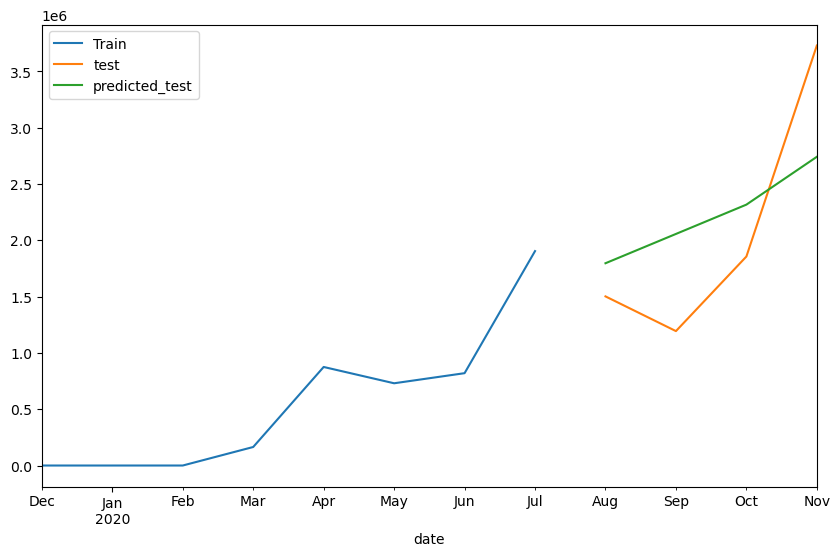

In [24]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [25]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
np.sqrt(mean_squared_error(test, test_pred))

710718.316550835

In [27]:
USA_only.cases.mean(), np.sqrt(USA_only.cases.var())

(1064812.8333333333, 1089779.606762915)

In [28]:
final_model=ExponentialSmoothing(USA_only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
pred=final_model.forecast(6)

In [30]:
pred

2020-12-31    3.013612e+06
2021-01-31    2.952078e+06
2021-02-28    3.497265e+06
2021-03-31    4.172090e+06
2021-04-30    4.054974e+06
2021-05-31    3.993439e+06
Freq: M, dtype: float64

<Axes: xlabel='date'>

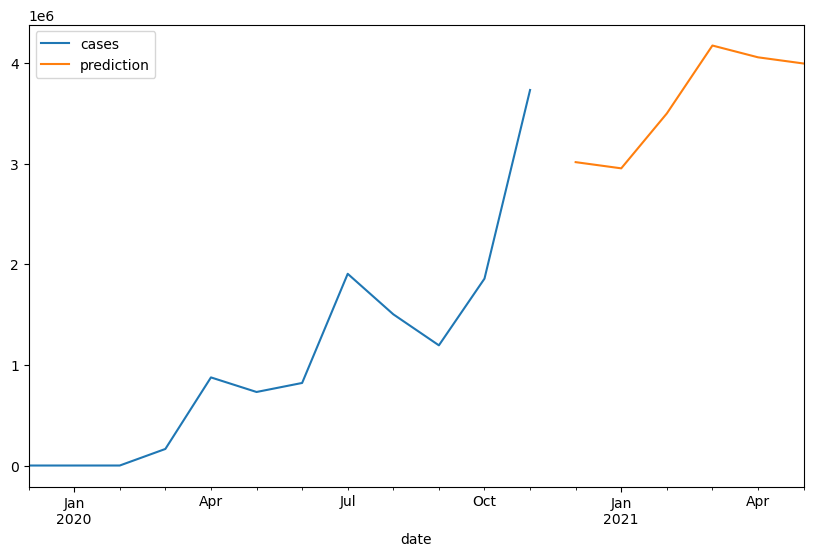

In [31]:
USA_only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')

### INDIA ONLY

In [32]:
India_only = df.loc[df['countriesAndTerritories'] == 'India']

In [33]:
India_only=India_only[['date','cases']]

In [34]:
India_only.head()

,date,cases
25107,2020-11-26,44489.0
25108,2020-11-25,44376.0
25109,2020-11-24,37975.0
25110,2020-11-23,44059.0
25111,2020-11-22,45209.0


In [35]:
India_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 25107 to 25437
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    331 non-null    datetime64[ns]
 1   cases   331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


In [36]:
India_only=India_only.groupby('date').sum()

In [37]:
India_only

,cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-11-22,45209.0
2020-11-23,44059.0
2020-11-24,37975.0


In [38]:
India_only=India_only.resample(rule='M').median()

In [39]:
India_only.head()

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,22.5
2020-04-30,1021.0


<Axes: xlabel='date'>

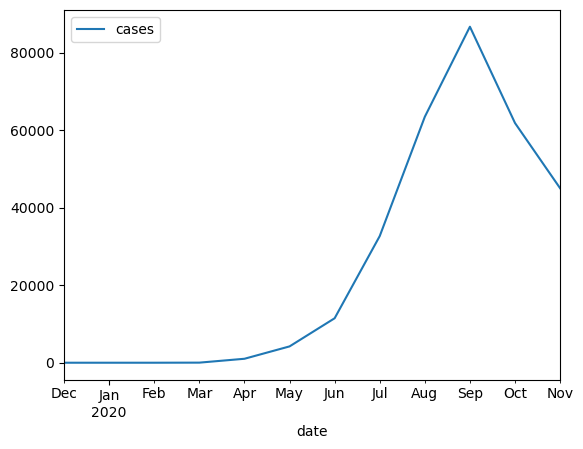

In [40]:
India_only.plot()

In [41]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


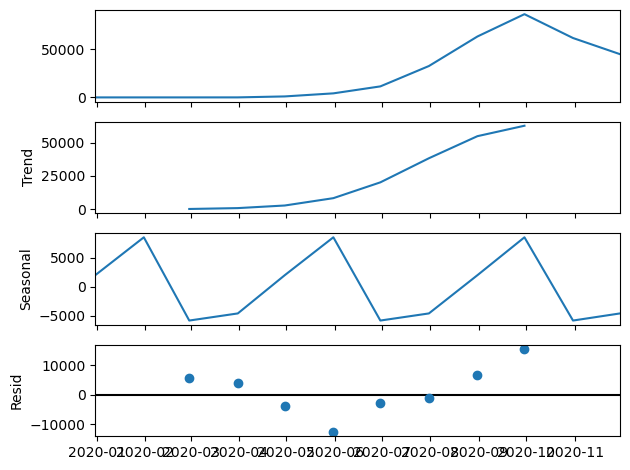

In [42]:
seasonal_decompose(India_only, model='additive', period=4).plot();

In [43]:
len(India_only)

12

In [44]:
train=India_only[:8]
test=India_only[8:]

In [45]:
train

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,22.5
2020-04-30,1021.0
2020-05-31,4213.0
2020-06-30,11480.0
2020-07-31,32695.0


In [46]:
test

,cases
date,
2020-08-31,63490.0
2020-09-30,86734.5
2020-10-31,61871.0
2020-11-30,45044.0


In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [48]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [49]:

test_pred=hwmodel.forecast(4)


In [50]:

test_pred

2020-08-31     53676.018548
2020-09-30     74750.044272
2020-10-31     95823.847330
2020-11-30    116919.540845
Freq: M, dtype: float64

<Axes: xlabel='date'>

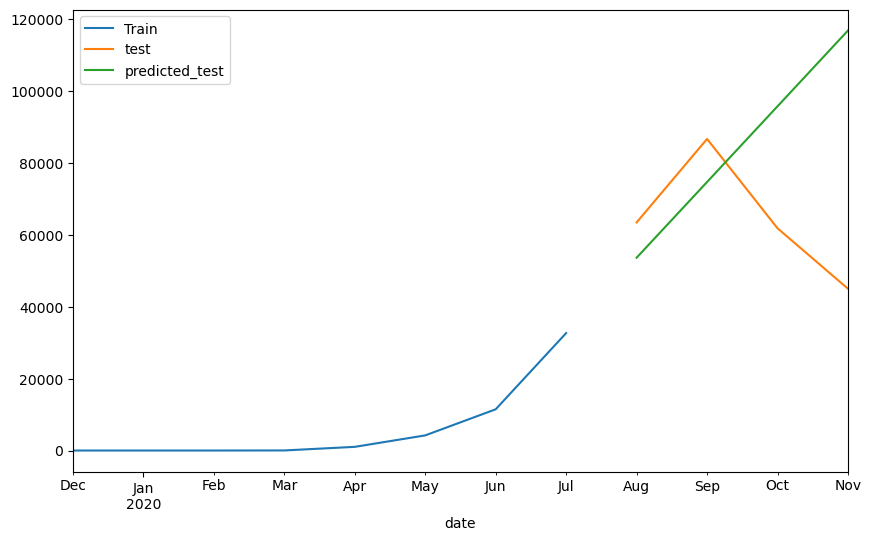

In [51]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [52]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
np.sqrt(mean_squared_error(test, test_pred))

40493.30384342892

In [54]:
India_only.cases.mean(), np.sqrt(India_only.cases.var())

(25547.583333333332, 31331.415744956907)

In [55]:
final_model=ExponentialSmoothing(India_only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [56]:
pred=final_model.forecast(5)

In [57]:
pred

2020-12-31    48210.124683
2021-01-31    51297.051724
2021-02-28    54380.109275
2021-03-31    57494.253050
2021-04-30    60559.979585
Freq: M, dtype: float64

<Axes: xlabel='date'>

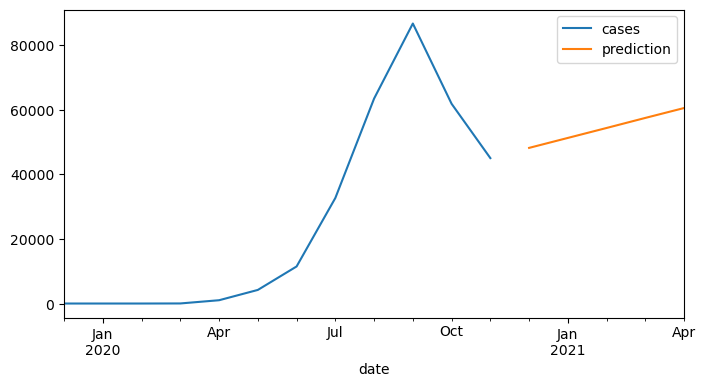

In [58]:
India_only['cases'].plot(legend=True, label='cases', figsize=(8,4))
pred.plot(legend=True, label='prediction')

### BRAZIL ONLY

In [59]:
Brazil_Only = df.loc[df['countriesAndTerritories'] == 'Brazil']

In [60]:
Brazil_Only=Brazil_Only[['date','cases']]

In [61]:
Brazil_Only.head()

,date,cases
7505,2020-11-26,47898.0
7506,2020-11-25,31100.0
7507,2020-11-24,16207.0
7508,2020-11-23,18615.0
7509,2020-11-22,32622.0


In [62]:
Brazil_Only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 7505 to 7836
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    332 non-null    datetime64[ns]
 1   cases   332 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


In [63]:
Brazil_Only=Brazil_Only.groupby('date').sum()

In [64]:
Brazil_Only

,cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-11-22,32622.0
2020-11-23,18615.0
2020-11-24,16207.0


In [65]:
Brazil_Only=Brazil_Only.resample(rule='M').median()

In [66]:
Brazil_Only.head()

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,34.0
2020-04-30,1992.5


<Axes: xlabel='date'>

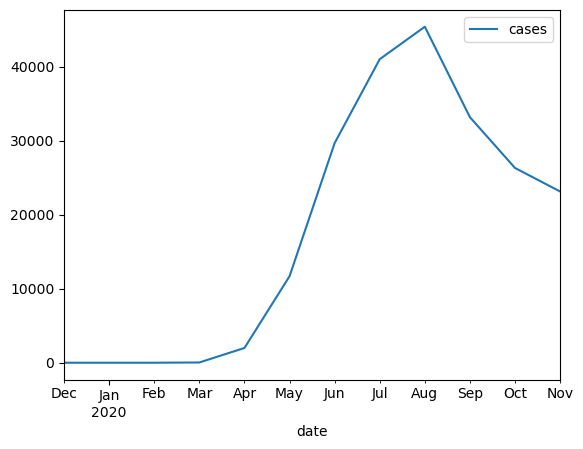

In [67]:
Brazil_Only.plot()

In [68]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


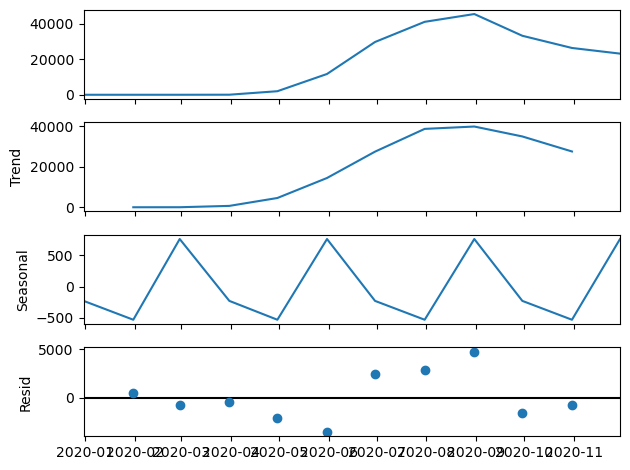

In [69]:
seasonal_decompose(Brazil_Only, model='additive', period=3).plot();

In [70]:
len(Brazil_Only)

12

In [71]:
train=Brazil_Only[:8]
test=Brazil_Only[8:]

In [72]:
train

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,34.0
2020-04-30,1992.5
2020-05-31,11687.0
2020-06-30,29674.0
2020-07-31,41008.0


In [73]:
test

,cases
date,
2020-08-31,45392.0
2020-09-30,33169.0
2020-10-31,26310.0
2020-11-30,23135.0


In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [75]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:

test_pred=hwmodel.forecast(4)


In [77]:

test_pred

2020-08-31    52398.788143
2020-09-30    63861.109283
2020-10-31    75273.401959
2020-11-30    86673.223243
Freq: M, dtype: float64

<Axes: xlabel='date'>

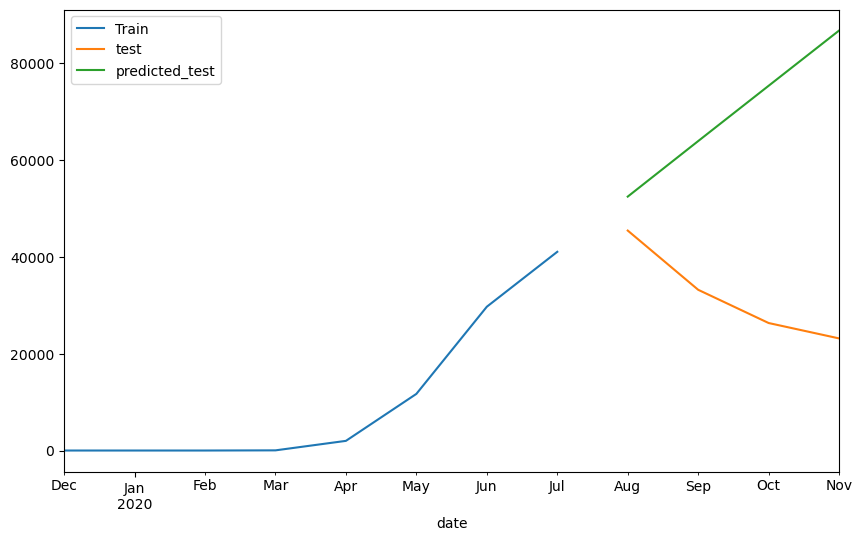

In [78]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [79]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [80]:
np.sqrt(mean_squared_error(test, test_pred))

43086.022085533135

In [81]:
Brazil_Only.cases.mean(), np.sqrt(India_only.cases.var())

(17700.125, 31331.415744956907)

In [82]:
final_model=ExponentialSmoothing(Brazil_Only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [83]:
pred=final_model.forecast(5)

In [84]:
pred

2020-12-31    19861.792589
2021-01-31    16642.140364
2021-02-28    13424.628057
2021-03-31    10236.834807
2021-04-30     6982.688751
Freq: M, dtype: float64

<Axes: xlabel='date'>

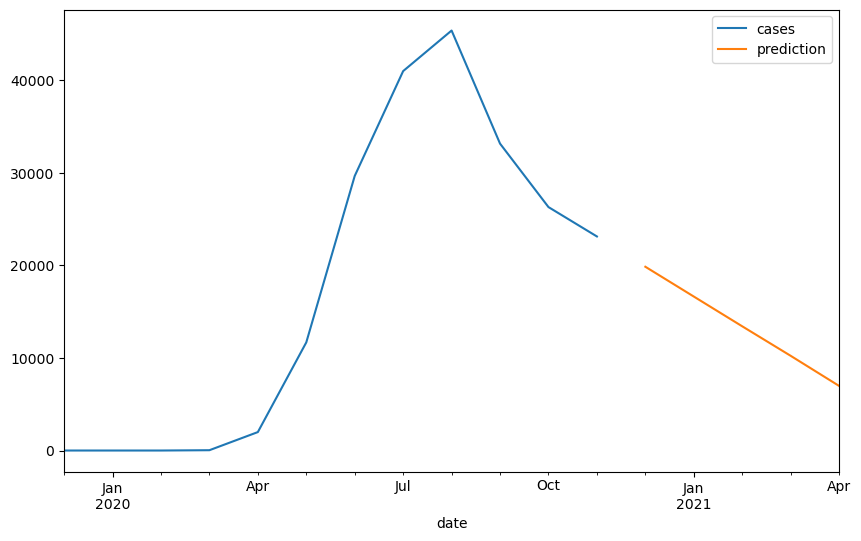

In [85]:
Brazil_Only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')

### RUSSIA ONLY

In [86]:
 Russia_Only = df.loc[df['countriesAndTerritories'] == 'Russia']

In [87]:
Russia_Only=Russia_Only[['date','cases']]

In [88]:
Russia_Only.head()

,date,cases
44057,2020-11-26,25487.0
44058,2020-11-25,23675.0
44059,2020-11-24,24326.0
44060,2020-11-23,25173.0
44061,2020-11-22,24581.0


In [89]:
Russia_Only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 44057 to 44388
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    332 non-null    datetime64[ns]
 1   cases   332 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


In [90]:
Russia_Only=Russia_Only.groupby('date').sum()

In [91]:
Russia_Only

,cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-11-22,24581.0
2020-11-23,25173.0
2020-11-24,24326.0


In [92]:
Russia_Only=Russia_Only.resample(rule='M').sum()

In [93]:
Russia_Only.head()

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,2.0
2020-03-31,1834.0
2020-04-30,97563.0


<Axes: xlabel='date'>

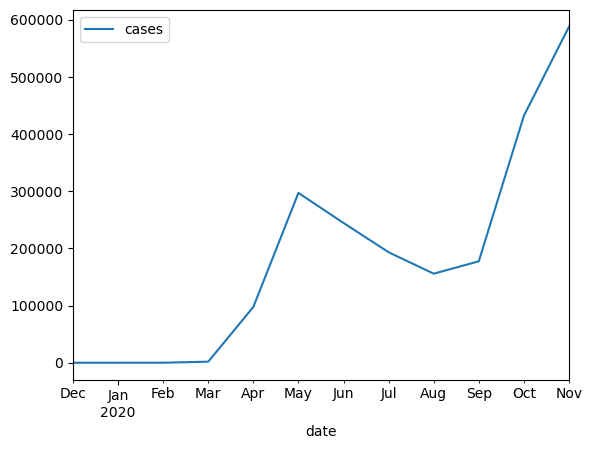

In [94]:
Russia_Only.plot()

In [95]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


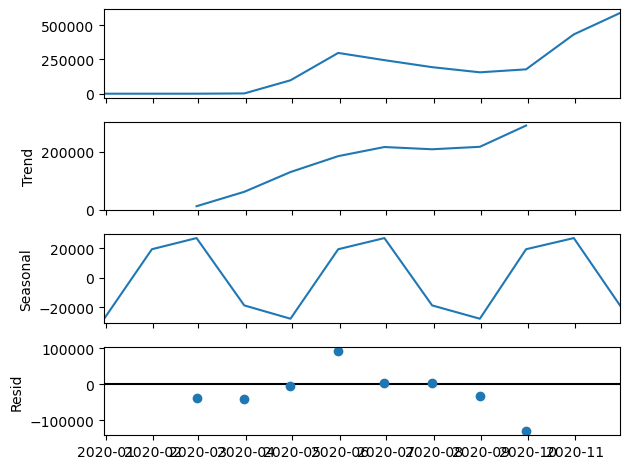

In [96]:
seasonal_decompose(Russia_Only, model='additive', period=4).plot();

In [97]:
len(Russia_Only)

12

In [98]:
train=Russia_Only[:8]
test=Russia_Only[8:]

In [99]:
train

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,2.0
2020-03-31,1834.0
2020-04-30,97563.0
2020-05-31,297176.0
2020-06-30,244581.0
2020-07-31,193343.0


In [100]:
test

,cases
date,
2020-08-31,155827.0
2020-09-30,177479.0
2020-10-31,432171.0
2020-11-30,588014.0


In [101]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [102]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [103]:

test_pred=hwmodel.forecast(4)


In [104]:

test_pred

2020-08-31    243945.441980
2020-09-30    295860.027813
2020-10-31    347741.215456
2020-11-30    401487.952692
Freq: M, dtype: float64

<Axes: xlabel='date'>

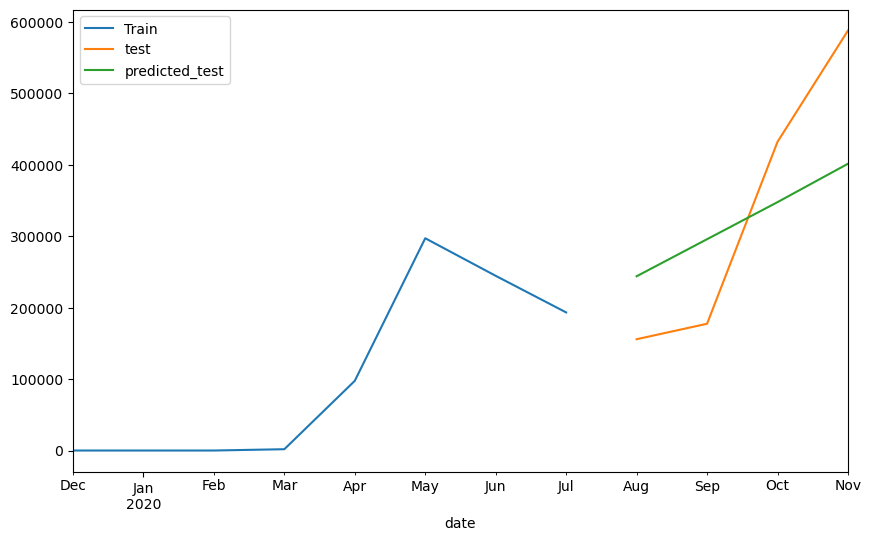

In [105]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [106]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [107]:
np.sqrt(mean_squared_error(test, test_pred))

126193.58383607234

In [108]:
Russia_Only.cases.mean(), np.sqrt(Russia_Only.cases.var())

(182332.5, 186939.041801672)

In [109]:
final_model=ExponentialSmoothing(Russia_Only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [110]:
pred=final_model.forecast(5)

In [111]:
pred

2020-12-31    637593.705919
2021-01-31    689532.637483
2021-02-28    741455.764812
2021-03-31    795190.288083
2021-04-30    845285.553078
Freq: M, dtype: float64

<Axes: xlabel='date'>

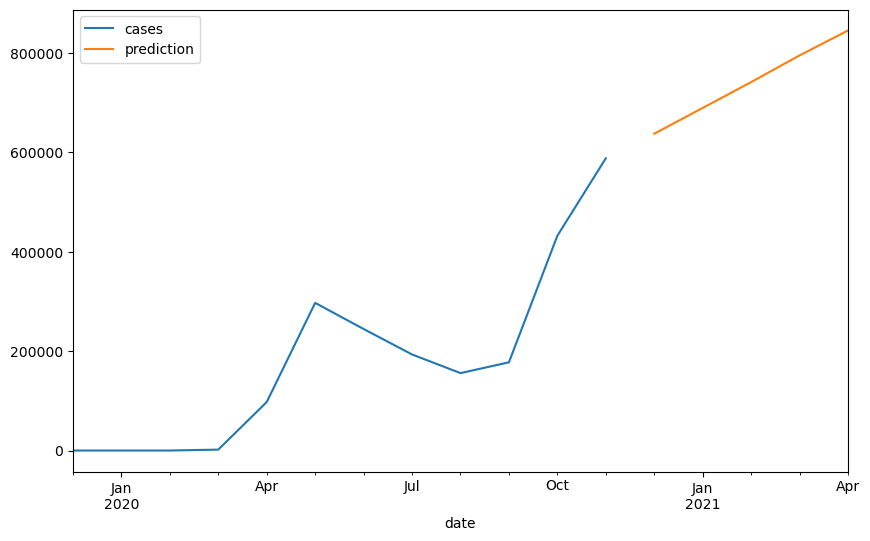

In [112]:
Russia_Only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')

### FRANCE ONLY

In [113]:
France_Only = df.loc[df['countriesAndTerritories'] == 'France']

In [114]:
France_Only=France_Only[['date','cases']]

In [115]:
France_Only.head()

,date,cases
19122,2020-11-26,16282.0
19123,2020-11-25,9155.0
19124,2020-11-24,4452.0
19125,2020-11-23,13157.0
19126,2020-11-22,17881.0


In [116]:
France_Only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 19122 to 19453
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    332 non-null    datetime64[ns]
 1   cases   332 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


In [117]:
France_Only=France_Only.groupby('date').sum()

In [118]:
France_Only

,cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-11-22,17881.0
2020-11-23,13157.0
2020-11-24,4452.0


In [119]:
France_Only=France_Only.resample(rule='M').median()

In [120]:
France_Only.head()

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,924.0
2020-04-30,2601.0


<Axes: xlabel='date'>

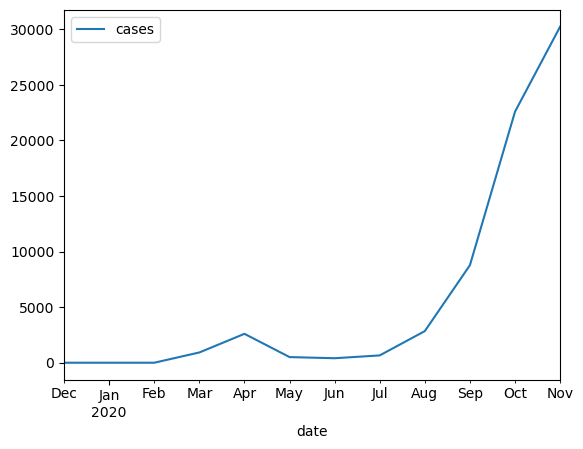

In [121]:
France_Only.plot()

In [122]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


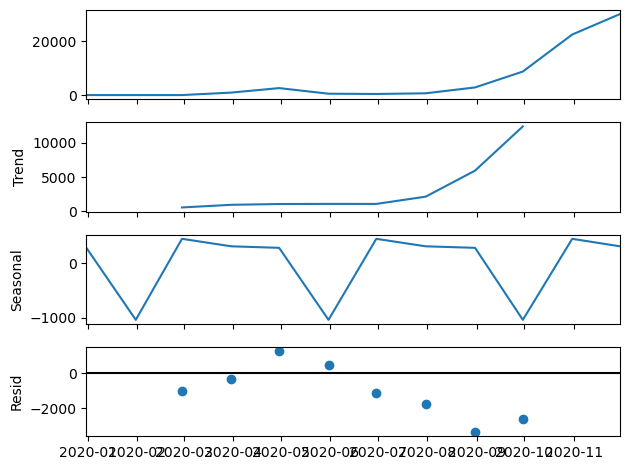

In [123]:
seasonal_decompose(France_Only, model='additive', period=4).plot();

In [124]:
len(France_Only)

12

In [125]:
train=France_Only[:8]
test=France_Only[8:]

In [126]:
train

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,0.0
2020-03-31,924.0
2020-04-30,2601.0
2020-05-31,507.0
2020-06-30,405.0
2020-07-31,658.0


In [127]:
test

,cases
date,
2020-08-31,2846.0
2020-09-30,8776.0
2020-10-31,22591.0
2020-11-30,30239.0


In [128]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [129]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

In [130]:

test_pred=hwmodel.forecast(4)


In [131]:

test_pred

2020-08-31    3116.184720
2020-09-30    1059.302643
2020-10-31     963.138271
2020-11-30    2099.284238
Freq: M, dtype: float64

<Axes: xlabel='date'>

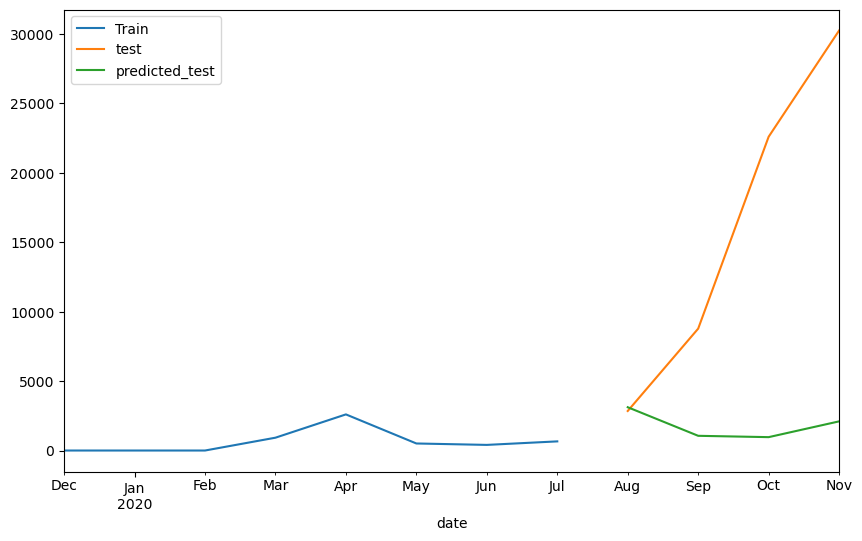

In [132]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [133]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [134]:
np.sqrt(mean_squared_error(test, test_pred))

18160.592116033065

In [135]:
France_Only.cases.mean(), np.sqrt(France_Only.cases.var())

(5795.583333333333, 10069.196388069662)

In [136]:
final_model=ExponentialSmoothing(France_Only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [137]:
pred=final_model.forecast(6)

In [138]:
pred

2020-12-31    39936.793399
2021-01-31    48809.670033
2021-02-28    59924.465797
2021-03-31    68263.309930
2021-04-30    77643.807075
2021-05-31    86516.683709
Freq: M, dtype: float64

<Axes: xlabel='date'>

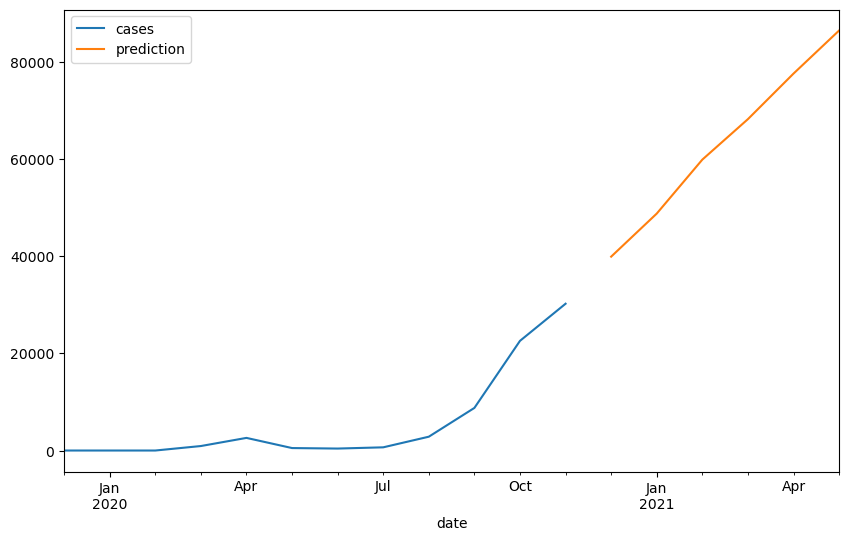

In [139]:
France_Only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')

### SPAIN ONLY

In [140]:
 Spain_Only = df.loc[df['countriesAndTerritories'] == 'Spain']

In [141]:
Spain_Only=Spain_Only[['date','cases']]

In [142]:
Spain_Only.head()

,date,cases
49483,2020-11-25,10222.0
49484,2020-11-24,12228.0
49485,2020-11-23,25886.0
49486,2020-11-22,0.0
49487,2020-11-21,0.0


In [143]:
Spain_Only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 49483 to 49813
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    331 non-null    datetime64[ns]
 1   cases   331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


In [144]:
Spain_Only=Spain_Only.groupby('date').sum()

In [145]:
Spain_Only

,cases
date,
2019-12-31,0.0
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
...,...
2020-11-21,0.0
2020-11-22,0.0
2020-11-23,25886.0


In [146]:
Spain_Only=Spain_Only.resample(rule='M').sum()

In [147]:
Spain_Only.head()

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,54.0
2020-03-31,104213.0
2020-04-30,111629.0


<Axes: xlabel='date'>

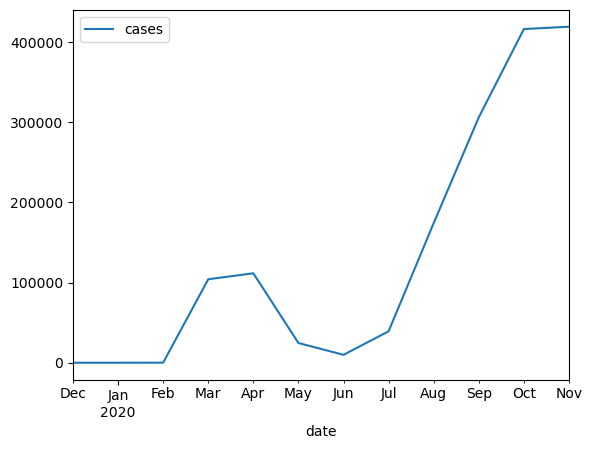

In [148]:
Spain_Only.plot()

In [149]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


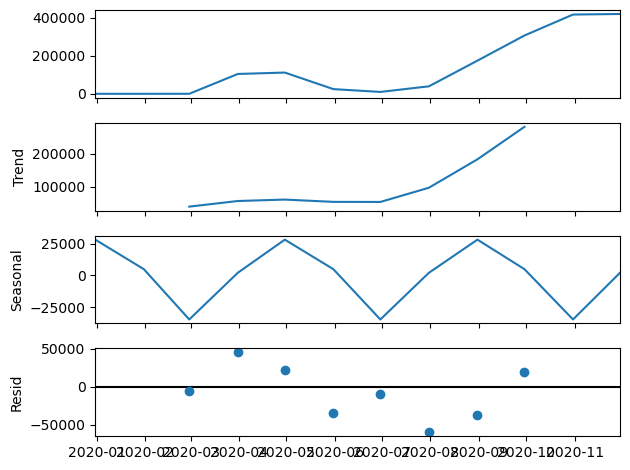

In [150]:
seasonal_decompose(Spain_Only, model='additive', period=4).plot();

In [151]:
len(Spain_Only)

12

In [152]:
train=Spain_Only[:8]
test=Spain_Only[8:]

In [153]:
train

,cases
date,
2019-12-31,0.0
2020-01-31,0.0
2020-02-29,54.0
2020-03-31,104213.0
2020-04-30,111629.0
2020-05-31,24618.0
2020-06-30,9842.0
2020-07-31,39251.0


In [154]:
test

,cases
date,
2020-08-31,174336.0
2020-09-30,306330.0
2020-10-31,416490.0
2020-11-30,419388.0


In [155]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [156]:
hwmodel=ExponentialSmoothing(train.cases,trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [157]:

test_pred=hwmodel.forecast(4)


In [158]:

test_pred

2020-08-31    131435.063901
2020-09-30     44403.677431
2020-10-31     29681.918911
2020-11-30    144745.149553
Freq: M, dtype: float64

<Axes: xlabel='date'>

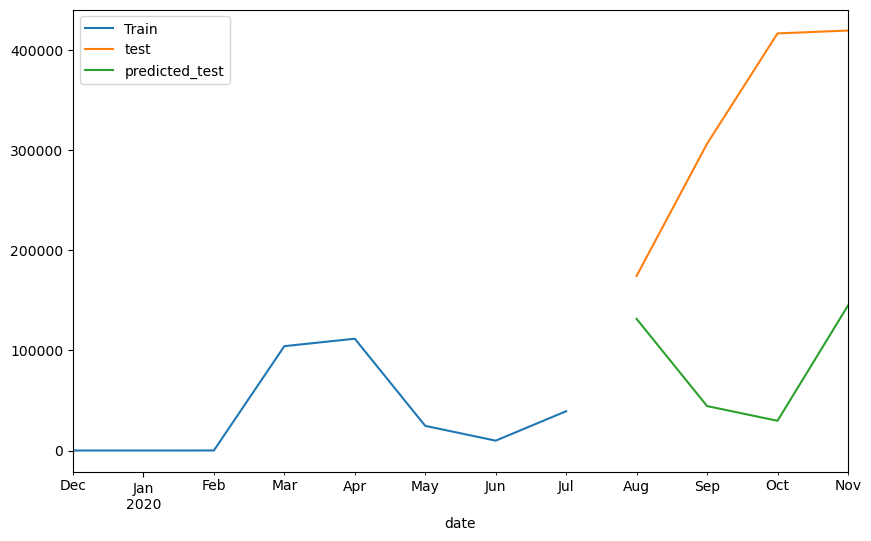

In [159]:
train['cases'].plot(legend=True, label='Train', figsize=(10,6))
test['cases'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='predicted_test')

In [160]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [161]:
np.sqrt(mean_squared_error(test, test_pred))

271797.29380114446

In [162]:
Spain_Only.cases.mean(), np.sqrt(Spain_Only.cases.var())

(133845.91666666666, 160728.31660767773)

In [163]:
final_model=ExponentialSmoothing(Russia_Only.cases, trend='add', seasonal='add', seasonal_periods=4).fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [164]:
pred=final_model.forecast(5)

In [165]:
pred

2020-12-31    637593.705919
2021-01-31    689532.637483
2021-02-28    741455.764812
2021-03-31    795190.288083
2021-04-30    845285.553078
Freq: M, dtype: float64

<Axes: xlabel='date'>

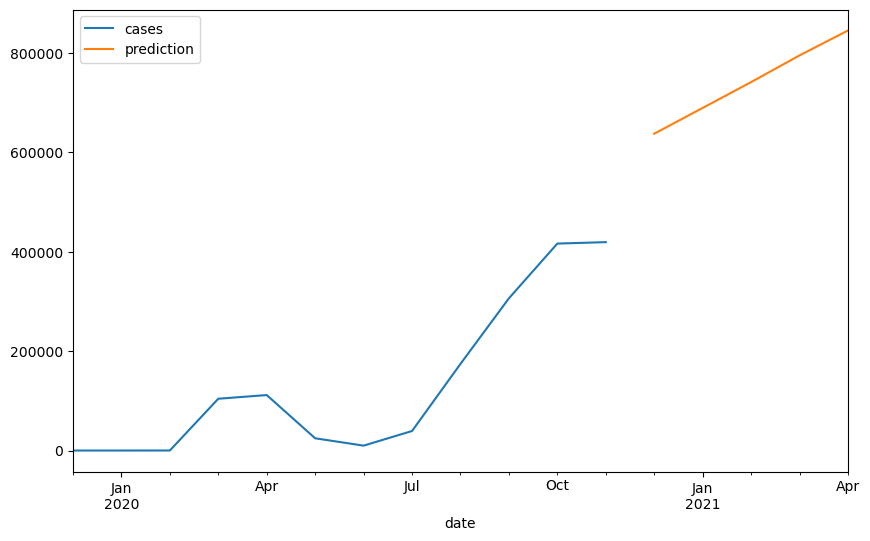

In [166]:
Spain_Only['cases'].plot(legend=True, label='cases', figsize=(10,6))
pred.plot(legend=True, label='prediction')